## Activation Stats

We want to figure out how to use `ActivationStats` to debug our neural networks. Can we see if something has gone wrong during training?

In [1]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *
from torchvision.models import resnet34

In [2]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.jpg$'),
                 item_tfms=Resize(256),
                 batch_tfms=aug_transforms(size=128, max_rotate=30, min_scale=0.75))

In [3]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=64)

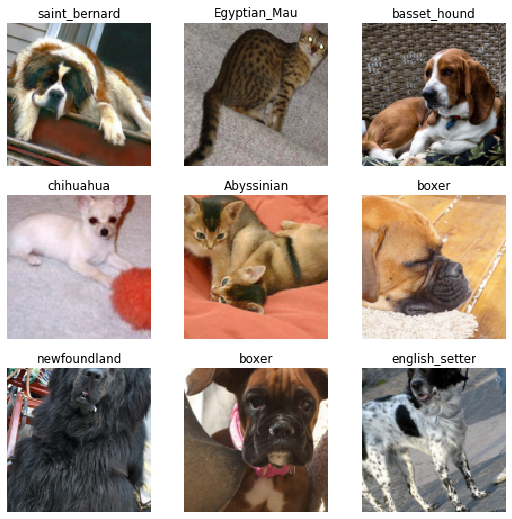

In [4]:
dls.show_batch(max_n=9)

In [5]:
opt_func = partial(Adam, lr=slice(3e-3), wd=0.01, eps=1e-8)

In [6]:
learn = cnn_learner(dls, resnet34, opt_func=opt_func, metrics=error_rate, config=cnn_config(ps=0.33))

In [7]:
conv1 = learn.model[0][0]
conv2_x = learn.model[0][4][-1]
conv3_x = learn.model[0][5][-1]
conv4_x = learn.model[0][6][-1]
conv5_x = learn.model[0][7][-1]

In [8]:
hook = ActivationStats(every=1, with_hist=True, modules=[conv1, conv2_x, conv3_x, conv4_x, conv5_x])

In [9]:
learn.fit_one_cycle(3 ,cbs=[hook])

epoch,train_loss,valid_loss,error_rate,time
0,1.915659,0.585584,0.186062,00:26
1,0.951000,0.461038,0.146820,00:26
2,0.662856,0.439905,0.137348,00:25


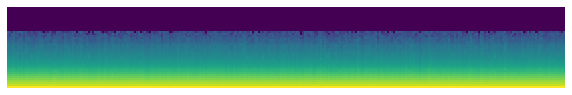

In [10]:
hook.plot_hist(0)

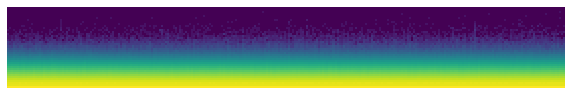

In [11]:
hook.plot_hist(1)

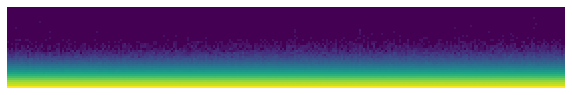

In [12]:
hook.plot_hist(2)

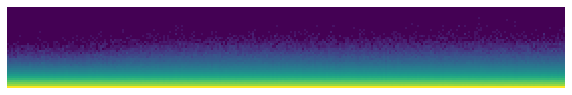

In [13]:
hook.plot_hist(3)

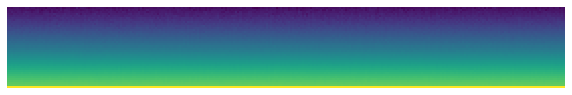

In [14]:
hook.plot_hist(4)